# Лабораторная работа №5

**Выполнили:**
* Новичков Дмитрий 438329
* Чемякин Андрей 285610
* Васильев Василий 367963

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

## Датасет №1. Air Quality and Pollution Assessment
### Загрузим датасет

In [ ]:
url = 'https://drive.google.com/uc?id=1w-R855o8GegnRptuiiQnmAhLgyFTpe3L'
data_classification = pd.read_csv(url)

data_classification.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


### Препроцессинг и отбор признаков

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif


data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
data_classification.drop_duplicates(keep='first',inplace=True)
data_classification.isnull().any()

,0
Temperature,False
Humidity,False
PM2.5,False
PM10,False
NO2,False
SO2,False
CO,False
Proximity_to_Industrial_Areas,False
Population_Density,False
Air Quality,False


In [ ]:
le = LabelEncoder()
data_classification['Air Quality'] = le.fit_transform(data_classification['Air Quality'])

In [ ]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


In [ ]:
for col in data_classification.drop(columns='Air Quality').columns:
    q1=np.quantile(data_classification[col],0.25)
    q3=np.quantile(data_classification[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    data_classification=data_classification[(data_classification[col]>=lb)&(data_classification[col]<=ub)]

In [ ]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


In [ ]:
corr_matrix = data_classification.drop(columns='Air Quality').corr().abs()
upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
to_drop = [column for column in upper_triangle.columns if (upper_triangle[column] > 0.8).sum() > 0]
data_classification.drop(columns=to_drop, inplace=True)

In [ ]:
data_classification.head(5)

,Temperature,Humidity,PM2.5,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,21.9,5.6,1.01,12.7,303,0


### Разделение данных

In [ ]:
from sklearn.model_selection import train_test_split

X = data_classification.drop(columns='Air Quality')
y = data_classification['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2910, 8) (2910,) (1248, 8) (1248,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Модели классификации

#### Бэггинг: Случайный лес (Random Forest)

1. **Принцип работы случайного леса**:
   Случайный лес представляет собой ансамбль $ T $ деревьев решений:
   $$
   F(x) = \frac{1}{T} \sum_{t=1}^T h_t(x),
   $$
   где $ h_t(x) $ — предсказание $ t $-го дерева, $ F(x) $ — итоговое решение.

2. **Параметры модели**:
   - $ n_{\text{estimators}} $: число деревьев.
   - $ \text{max_depth} $: максимальная глубина дерева.
   - $ \text{max_features} $: число признаков для выбора на каждом шаге.
   - $ \text{min_samples_split} $: минимальное количество образцов, необходимое для разделения узла.
   - $ \text{min_samples_leafЪ} $: минимальное количество образцов, которое должно быть в каждом листе (конце дерева).
   - $ \text{bootstrap} $: использовать ли выборку с возвращением при обучении деревьев.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 30, 50, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Лучшие параметры Random Forest:", grid_rf.best_params_)

Лучшие параметры Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


#### Градиентный бустинг

1. **Принцип работы градиентного бустинга**:
   Градиентный бустинг минимизирует функционал:
   $$
   L(F) = \sum_{i=1}^n \ell(y_i, F(x_i)),
   $$
   где $ \ell(y_i, \cdot) $ — функция потерь, \$ F(x_i) $ — ансамбль деревьев:
   $$
   F(x) = \sum_{t=1}^T \eta h_t(x).
   $$
   Здесь $ h_t(x) $ — дерево на $ t $-й итерации, $ \eta $ — темп обучения.

2. **Используемая функция потерь**:
   Для классификации:
   $$
   \ell(y_i, p) = -y_i \log(p) - (1 - y_i) \log(1 - p).
   $$

#### a) Градиентный бустинг с CatBoost (from Yandex with love)

1. **Принципы работы CatBoost**:
   - Градиентный бустинг минимизирует функционал:
     $$
     L(\Theta) = \sum_{i=1}^n \ell(y_i, F(x_i, \Theta)),
     $$
     где $F(x_i, \Theta)$ — ансамбль деревьев, $\ell(y_i, \cdot)$ — функция потерь.

<!-- 2. **Гиперпараметры для подбора**:
   $$
   \begin{aligned}
       &\text{iterations: число итераций обучения}, \\
       &\text{depth: глубина дерева}, \\
       &\text{learning_rate: скорость обучения}.
   \end{aligned}
   $$ -->

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
       iterations=200,
       depth=6,
       learning_rate=0.1,
       random_seed=42,
       verbose=False
   )

In [ ]:
param_grid_cat = {
    "iterations": [100, 200, 300, 500],
    "depth": [4, 6, 10, 16],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "l2_leaf_reg": [1, 3, 5, 10],
    "bagging_temperature": [0, 0.5, 1],
    "border_count": [32, 128, 254],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")


grid_cat = GridSearchCV(cat_model, param_grid_cat, cv=5, scoring="accuracy", n_jobs=-1)
grid_cat.fit(X_train, y_train)
best_cat = grid_cat.best_estimator_
print("Лучшие параметры CatBoost:", grid_cat.best_params_)

Лучшие параметры CatBoost: {'depth': 5, 'iterations': 100, 'learning_rate': 0.2}


#### b) Градиентный бустинг с XGBoost

1. **Принципы работы XGBoost**:
   - Модель минимизирует регуляризованную функцию потерь:
     $$
     L(\Theta) = \sum_{i=1}^n \ell(y_i, F(x_i, \Theta)) + \Omega(\Theta),
     $$
     где $\Omega(\Theta)$ — регуляризация для предотвращения переобучения.

<!-- 2. **Гиперпараметры для подбора**:
   $$
   \text{Гиперпараметры: }
   \begin{aligned}
       &\text{n_estimators: число деревьев}, \\
       &\text{max_depth: глубина дерева}, \\
       &\text{learning_rate: скорость обучения}.
   \end{aligned}
   $$ -->

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import itertools

param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10],
    "min_child_weight": [1, 5, 10],
    # "gamma": [0, 0.1, 0.5],
    # "subsample": [0.6, 0.8, 1.0],
    # "colsample_bytree": [0.6, 0.8, 1.0]
}

param_combinations = list(itertools.product(
    param_grid_xgb["n_estimators"],
    param_grid_xgb["learning_rate"],
    param_grid_xgb["max_depth"],
    param_grid_xgb["min_child_weight"],
))

best_params = None
best_score = 0
best_xgb = None

for params in param_combinations:
    current_params = {
        "n_estimators": params[0],
        "learning_rate": params[1],
        "max_depth": params[2],
        "min_child_weight": params[3],
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42
    }

    model = XGBClassifier(**current_params)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_params = current_params
        best_xgb = model

print("\nЛучшие параметры XGBoost:")
for key, value in best_params.items():
    print(f"{key}: {value}")
print(f"\nЛучшая точность: {best_score:.4f}\n")

print("Лучшая модель:\n", best_xgb)


Лучшие параметры XGBoost:
n_estimators: 50
learning_rate: 0.2
max_depth: 3
min_child_weight: 5
use_label_encoder: False
eval_metric: logloss
random_state: 42

Лучшая точность: 0.9591

Лучшая модель:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


### Оценка классификации
#### **Метрики для классификации**

#### Основные метрики
1. **Accuracy (Точность)**  
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
   - Подходит для сбалансированных данных.

2. **Precision (Точность по классу)**  
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
   - Указывает, насколько точно модель классифицирует положительный класс.

3. **Recall (Полнота)**  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
   - Показывает долю найденных положительных объектов из всех положительных.

4. **F1-Score** (Гармоническое среднее Precision и Recall):
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "F1-Score": f1_score(y_true, y_pred, average="weighted"),
    }

y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_cat = best_cat.predict(X_test)

metrics_rf = evaluate_model(y_test, y_pred_rf)
metrics_xgb = evaluate_model(y_test, y_pred_xgb)
metrics_cat = evaluate_model(y_test, y_pred_cat)

print("Метрики Random Forest:", metrics_rf)
print("Метрики XGBoost:", metrics_xgb)
print("Метрики CatBoost:", metrics_cat)

Метрики Random Forest: {'Accuracy': 0.9591346153846154, 'Precision': 0.9604924520976116, 'Recall': 0.9591346153846154, 'F1-Score': 0.9554757249083478}
Метрики XGBoost: {'Accuracy': 0.9591346153846154, 'Precision': 0.9604654391593487, 'Recall': 0.9591346153846154, 'F1-Score': 0.9554536870413244}
Метрики CatBoost: {'Accuracy': 0.9599358974358975, 'Precision': 0.9600191621021509, 'Recall': 0.9599358974358975, 'F1-Score': 0.9580529857240432}


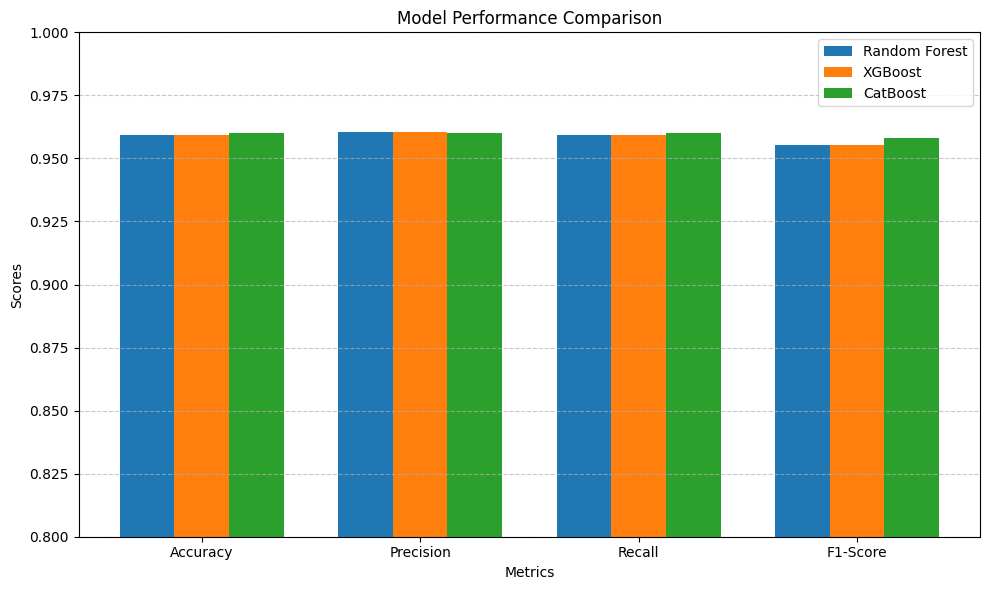

In [ ]:
models = ["Random Forest", "XGBoost", "CatBoost"]
metrics = list(metrics_rf.keys())
values_rf = list(metrics_rf.values())
values_xgb = list(metrics_xgb.values())
values_cat = list(metrics_cat.values())

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, values_rf, width, label="Random Forest")
plt.bar(x, values_xgb, width, label="XGBoost")
plt.bar(x + width, values_cat, width, label="CatBoost")

plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x, metrics)
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
roc_auc_cat = roc_auc_score(y_test, best_cat.predict_proba(X_test), multi_class="ovr", average="weighted")
roc_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test), multi_class="ovr", average="weighted")

print(f"ROC-AUC для CatBoost: {roc_auc_cat:.2f}")
print(f"ROC-AUC для XGBoost: {roc_auc_xgb:.2f}")

ROC-AUC для CatBoost: 1.00
ROC-AUC для XGBoost: 1.00


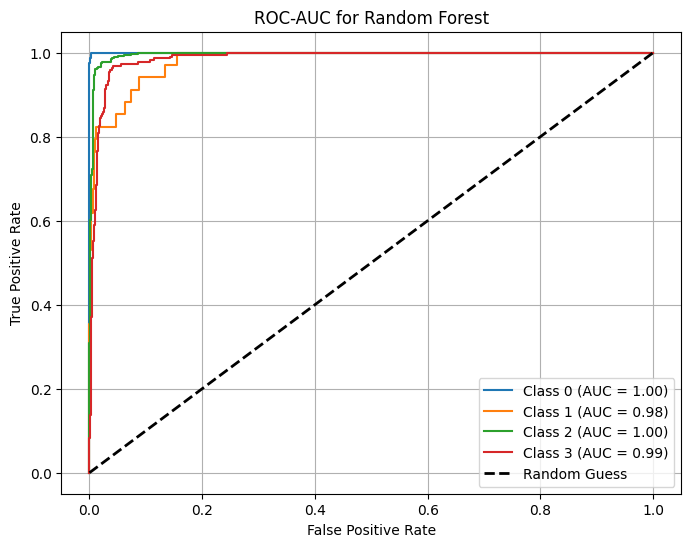

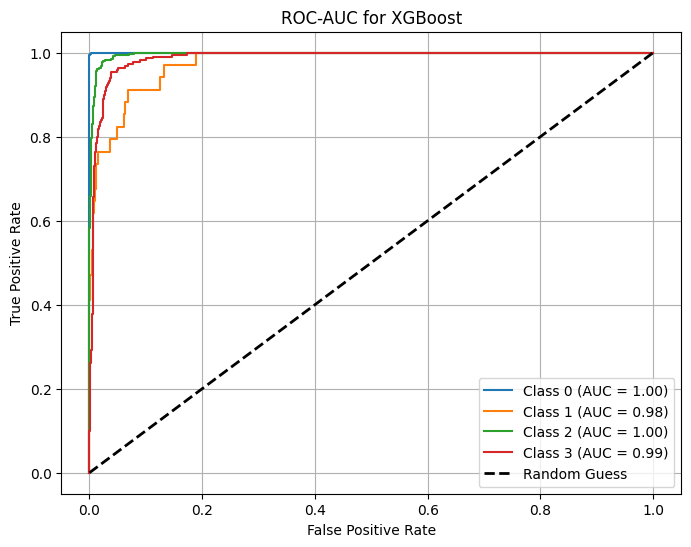

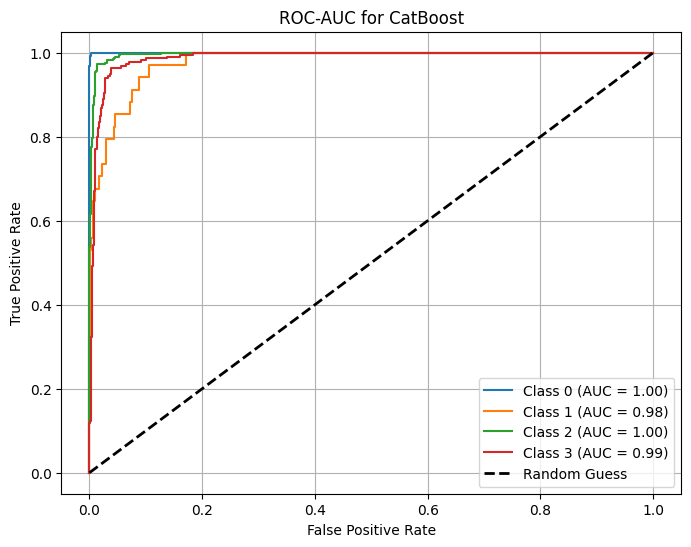

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

def plot_roc_auc(y_test_bin, y_probas, model_name):
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probas[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC for {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

probs_rf = best_rf.predict_proba(X_test)
probs_xgb = best_xgb.predict_proba(X_test)
probs_cat = best_cat.predict_proba(X_test)

plot_roc_auc(y_test_bin, probs_rf, "Random Forest")
plot_roc_auc(y_test_bin, probs_xgb, "XGBoost")
plot_roc_auc(y_test_bin, probs_cat, "CatBoost")